In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [9]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [10]:
# Shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


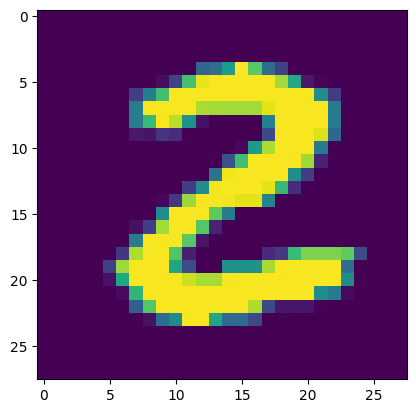

In [11]:
# Displaying the image
plt.imshow(X_train[25])
plt.show()

In [12]:
# print the corresponding label
print(Y_train[25])

2


In [13]:
# Unique values in Y_train
print(np.unique(Y_train))
# Unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [14]:
# Scaling the values
X_train = X_train/255
X_test = X_test/255

In [15]:
# Setting up the layers of the Neural  Network
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),
            keras.layers.Dense(50, activation='relu'),
            keras.layers.Dense(50, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')])

In [16]:
# Compiling the Neural Network
model.compile(optimizer='adam',
                         loss = 'sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [17]:
# Training the Neural Network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2991 - accuracy: 0.9127
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1435 - accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1055 - accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0856 - accuracy: 0.9740
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9823
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0472 - accuracy: 0.9848
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0421 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.036

In [18]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1056 - accuracy: 0.9715
0.9714999794960022


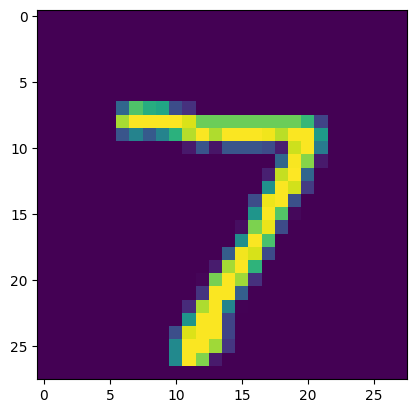

In [19]:
# First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [20]:
print(Y_test[0])

7


In [33]:
import numpy as np

# Assuming you've already defined and trained your model

# Predict on test data
Y_pred = model.predict(X_test)

# Get the predicted label for the first test image
label_for_first_test_image = np.argmax(Y_pred[0])
print("Predicted label for the first test image:", label_for_first_test_image)

# Print all the predicted labels (assuming Y_pred contains the labels)
print("Predicted labels for all test images:")
print(np.argmax(Y_pred, axis=1))


313/313 [==============================] - 2s 5ms/step
Predicted label for the first test image: 7
Predicted labels for all test images:
[7 2 1 ... 4 5 6]


In [35]:
from sklearn.metrics import confusion_matrix

# Assuming Y_test contains the true labels

# Convert predicted probabilities to predicted labels
Y_pred_labels = np.argmax(Y_pred, axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

# Print confusion matrix
print("Confusion matrix:")
print(conf_mat)


Confusion matrix:
[[ 963    1    1    1    1    3    7    1    2    0]
 [   0 1120    5    0    0    4    2    1    3    0]
 [   3    1  999    7    5    0    5    7    5    0]
 [   1    0    5  971    0   20    0    6    3    4]
 [   0    0    1    0  960    0    7    2    1   11]
 [   1    1    0    1    2  879    4    0    2    2]
 [   1    1    2    1    9    2  937    0    5    0]
 [   1    4   12    2    2    0    0  996    2    9]
 [   8    0    1   11    6   12    1    3  927    5]
 [   1    4    0    6   16    5    2    6    6  963]]


Text(0.5, 47.7222222222222, 'Predicted Labels')

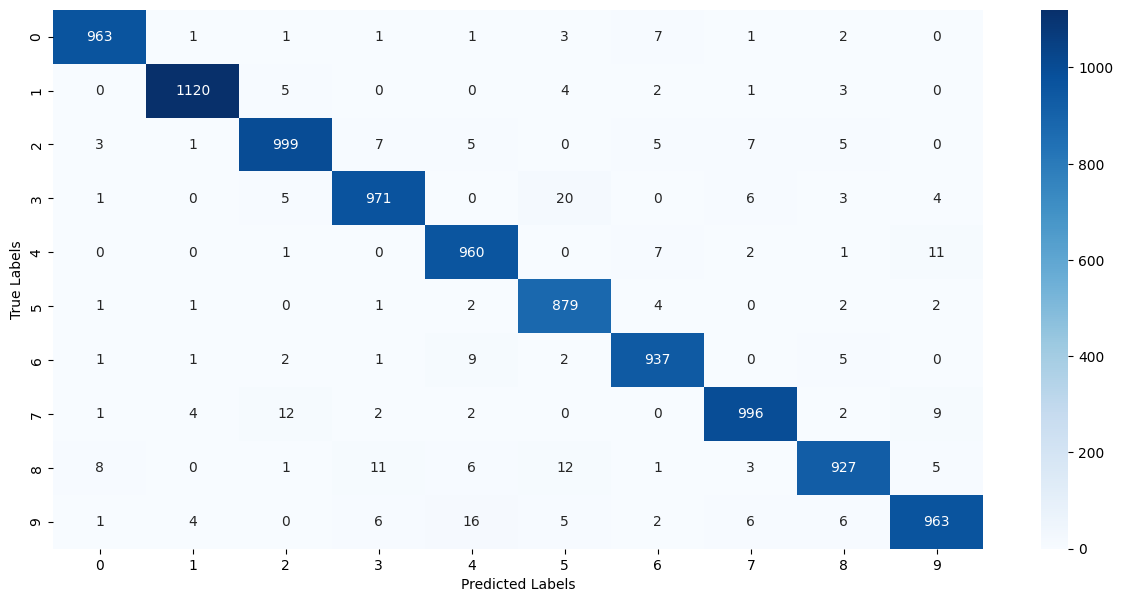

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [38]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ', input_pred_label)

Path of the image to be predicted: 3


AttributeError: 'NoneType' object has no attribute 'clip'

In [41]:
import cv2

# Prompt user to input image path
input_image_path = input('Path of the image to be predicted: ')

# Read the image
input_image = cv2.imread(input_image_path)

# Check if the image was successfully read
if input_image is not None:
    # Display the image
    cv2.imshow('Input Image', input_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Convert the image to grayscale
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28
    input_image_resize = cv2.resize(grayscale, (28, 28))

    # Normalize the pixel values
    input_image_resize = input_image_resize / 255.0

    # Reshape the image to match the model's input shape
    image_reshaped = input_image_resize.reshape((1, 28, 28))

    # Make prediction
    input_prediction = model.predict(image_reshaped)

    # Get the predicted label
    input_pred_label = np.argmax(input_prediction)

    print('The Handwritten Digit is recognized as:', input_pred_label)
else:
    print("Error: Unable to read the image from the specified path.")


Path of the image to be predicted: /content/WhatsApp Image 2024-06-04 at 18.22.53_be7ac68f.jpg


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


Path of the image to be predicted: /content/WhatsApp Image 2024-06-04 at 18.30.50_efbe3f66.jpg


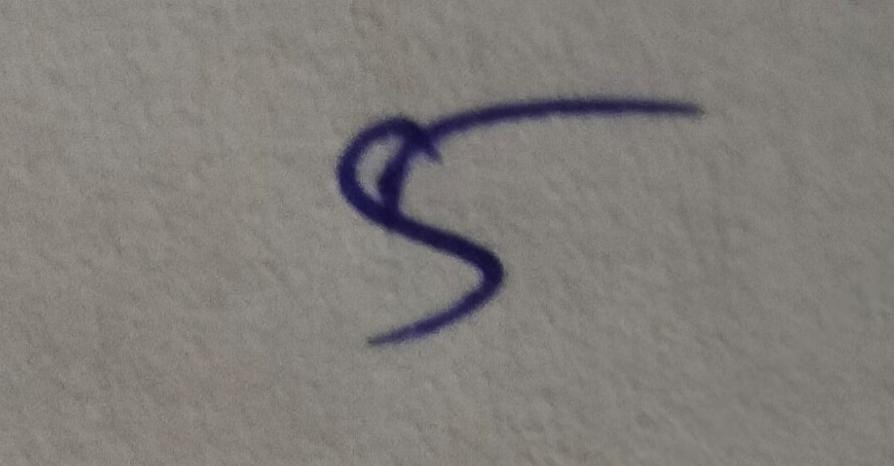

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognized as: 5


In [45]:
from google.colab.patches import cv2_imshow
import cv2

# Prompt user to input image path
input_image_path = input('Path of the image to be predicted: ')

# Read the image
input_image = cv2.imread(input_image_path)

# Check if the image was successfully read
if input_image is not None:
    # Display the image
    cv2_imshow(input_image)

    # Convert the image to grayscale
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28
    input_image_resize = cv2.resize(grayscale, (28, 28))

    # Normalize the pixel values
    input_image_resize = input_image_resize / 255.0

    # Reshape the image to match the model's input shape
    image_reshaped = input_image_resize.reshape((1, 28, 28))

    # Make prediction
    input_prediction = model.predict(image_reshaped)

    # Get the predicted label
    input_pred_label = np.argmax(input_prediction)

    print('The Handwritten Digit is recognized as:', input_pred_label)
else:
    print("Error: Unable to read the image from the specified path.")
